## Import Libraries

In [6]:
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import transforms
from torchvision.utils import make_grid,save_image

from matplotlib import pyplot as plt
from typing import Callable, Optional
from torchvision.datasets.utils import download_and_extract_archive

## Load DataSets

In [2]:
class FoodImageDataset(torchvision.datasets.ImageFolder):
    download_url = "https://drive.usercontent.google.com/download?id=1SlCFLq3GtDQ-LXKWNGxrvNsCkALIREgl&confirm=t&uuid=77e34988-8be5-4489-9807-6c286402cd06"

    def __init__(self, root: str, desired_class: Optional[str] = None, force_download: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None):
        self.download(root, force=force_download)

        super().__init__(root=root, transform=transform, target_transform=target_transform)

        if desired_class is not None:
            self.samples = [s for s in self.samples if self.classes[s[1]] in desired_class]
            self.targets = [s[1] for s in self.samples]
            print(f"INFO: Filtered dataset to include classes: {desired_class}")

    @classmethod
    def download(cls, root: str, force: bool = False):
        if force or not os.path.isfile(os.path.join(root, "datasets.zip")):
            download_and_extract_archive(cls.download_url, download_root=root, extract_root=root, filename="datasets.zip")
            print("INFO: Dataset archive downloaded and extracted.")
        else:
            print("INFO: Dataset archive found in the root directory. Skipping download.")

In [20]:
img_size = 64
img_norm = dict(
    mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
)

resizer = transforms.Compose([
    transforms.Resize(img_size),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize(**img_norm)
])

In [21]:
data_root = os.path.join(".", "data")
target_class = 'Bread'
dataset = FoodImageDataset(root=data_root, desired_class=target_class, force_download=False, transform=resizer)

INFO: Dataset archive found in the root directory. Skipping download.
INFO: Filtered dataset to include classes: Bread


## DataLoader

In [22]:
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

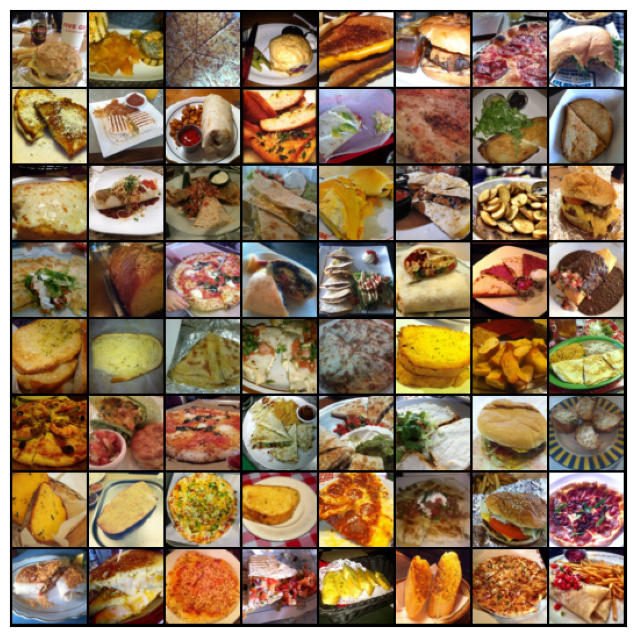

In [23]:
def show_batch(dataloader, nmax:int=64):
    def denorm(img_tensors):
        return img_tensors * img_norm["mean"][0] + img_norm["std"][0]
    
    def show_images(images, nmax):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
    
    for img, _ in dataloader:
        show_images(img, nmax)
        break
        
show_batch(dataloader)